In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
mmr = pd.read_csv('maternal.csv',skiprows=3)
mmr = mmr[['Country Code','2017']]
mmr = mmr.rename(columns={"2017":"Maternal Mortality Rate 2017"})

In [4]:
exclude_codes=['WLD', 'LAC', 'LCN', 'NAC', 'TLA', 'CEB', 'ECA', 'ECS', 'EU', 'TEC', 'EAP', 'EAS', 'SAS', 'TEA', 'TSA', 'MEA', 'MNA', 'SSA', 'SSF', 'TMN', 'TSS', 'ZAF', 'AFE', 'AFW', 'CAF']
mmr = mmr[~mmr['Country Code'].isin(exclude_codes)]
mmr = mmr.dropna()

In [5]:
births = pd.read_csv('health_worker.csv',skiprows=3)
births = births[['Country Name','Country Code','2017']]
births = births.rename(columns={"2017":"Percent of Births Attended by Health Professional 2017"})
births = births[~births['Country Code'].isin(exclude_codes)]
births = births.dropna()

In [6]:
mmr_births = mmr.merge(births,how='inner',on='Country Code')

In [7]:
codes = pd.read_csv('country-and-continent-codes-list-csv.csv')
codes = codes[['Continent_Name','Three_Letter_Country_Code']]
codes = codes.rename(columns={"Continent_Name":"Continent Name","Three_Letter_Country_Code":"Country Code"})

In [8]:
full_data = codes.merge(mmr_births,how='inner',on='Country Code')
full_data.head()

,Continent Name,Country Code,Maternal Mortality Rate 2017,Country Name,Percent of Births Attended by Health Professional 2017
0,Asia,AFG,638.0,Afghanistan,53.4
1,North America,ATG,42.0,Antigua and Barbuda,100.0
2,Europe,AZE,26.0,Azerbaijan,99.8
3,Asia,AZE,26.0,Azerbaijan,99.8
4,South America,ARG,39.0,Argentina,93.9


Test Scatter Plot

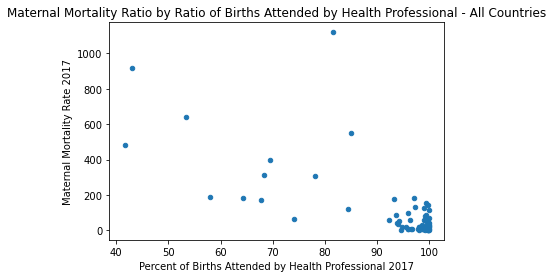

In [9]:
ax = full_data.plot(title='Maternal Mortality Ratio by Ratio of Births Attended by Health Professional - All Countries',kind='scatter',x='Percent of Births Attended by Health Professional 2017',y='Maternal Mortality Rate 2017')

In [10]:
continents = full_data['Continent Name']
mmr = full_data['Maternal Mortality Rate 2017']
births = full_data['Percent of Births Attended by Health Professional 2017']

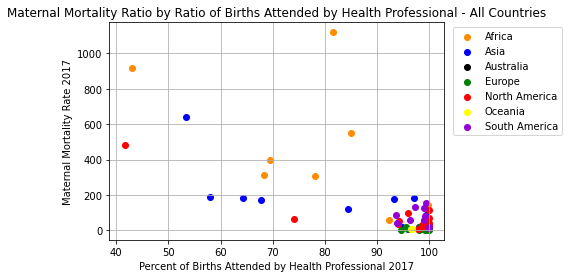

In [11]:
plt.title('Maternal Mortality Ratio by Ratio of Births Attended by Health Professional - All Countries')
plt.xlabel('Percent of Births Attended by Health Professional 2017')
plt.ylabel('Maternal Mortality Rate 2017')

ax = plt.scatter(births[full_data['Continent Name']=='Africa'],mmr[full_data['Continent Name']=='Africa'],c='darkorange',label='Africa')
ax = plt.scatter(births[full_data['Continent Name']=='Asia'],mmr[full_data['Continent Name']=='Asia'],c='blue',label='Asia')
ax = plt.scatter(births[full_data['Continent Name']=='Australia'],mmr[full_data['Continent Name']=='Australia'],c='black',label='Australia')
ax = plt.scatter(births[full_data['Continent Name']=='Europe'],mmr[full_data['Continent Name']=='Europe'],c='green',label='Europe')
ax = plt.scatter(births[full_data['Continent Name']=='North America'],mmr[full_data['Continent Name']=='North America'],c='red',label='North America')
ax = plt.scatter(births[full_data['Continent Name']=='Oceania'],mmr[full_data['Continent Name']=='Oceania'],c='yellow',label='Oceania')
ax = plt.scatter(births[full_data['Continent Name']=='South America'],mmr[full_data['Continent Name']=='South America'],c='darkviolet',label='South America')
plt.legend(bbox_to_anchor=(1.01,1))
plt.grid()

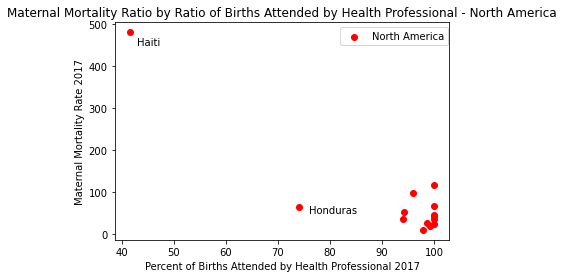

In [46]:
plt.title('Maternal Mortality Ratio by Ratio of Births Attended by Health Professional - North America')
plt.xlabel('Percent of Births Attended by Health Professional 2017')
plt.ylabel('Maternal Mortality Rate 2017')

ax = plt.scatter(births[full_data['Continent Name']=='North America'],mmr[full_data['Continent Name']=='North America'],c='red',label='North America')
plt.text(43,450,"Haiti", color='black')
plt.text(76,50,"Honduras", color='black')
plt.legend(bbox_to_anchor=(1.01,1))

In [43]:
full_data[full_data['Continent Name']=='North America'].info

<bound method DataFrame.info of    Continent Name Country Code  Maternal Mortality Rate 2017  \
1   North America          ATG                          42.0   
14  North America          BLZ                          36.0   
17  North America          CAN                          10.0   
21  North America          CRI                          27.0   
23  North America          CUB                          36.0   
29  North America          SLV                          46.0   
36  North America          GRD                          25.0   
37  North America          HTI                         480.0   
38  North America          HND                          65.0   
56  North America          NIC                          98.0   
59  North America          PAN                          52.0   
67  North America          LCA                         117.0   
75  North America          TTO                          67.0   
79  North America          USA                          19.0   

       